In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
train=pd.read_csv('/content/DengAI_Predicting_Disease_Spread_-_Training_Data_Features.csv')

In [ ]:
train.sample(5)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
437,Mumbai,1998,39,24/09/1998,0.050850,0.046850,0.231586,0.206686,82.87,300.130000,...,55.80,83.331429,82.87,18.581429,1.857143,27.771429,6.228571,32.2,24.4,123.6
490,Mumbai,1999,39,01/10/1999,0.050167,0.039467,0.169983,0.161283,62.41,300.644286,...,64.72,79.837143,62.41,18.345714,2.214286,28.714286,7.957143,34.4,23.9,38.9
1031,Nagpur,2002,18,30/04/2002,0.170357,0.141829,0.197729,0.257071,60.05,297.408571,...,52.60,93.845714,60.05,17.807143,7.500000,NaN,NaN,33.5,21.2,1.0
1071,Nagpur,2003,6,05/02/2003,0.191450,0.086429,0.136800,0.156714,56.36,297.218571,...,170.60,94.552857,56.36,17.852857,7.457143,26.600000,7.000000,33.8,22.4,41.9
173,Mumbai,1993,34,27/08/1993,0.108850,0.249250,0.210571,0.215914,1.36,299.918571,...,26.90,81.727143,1.36,17.917143,2.314286,28.971429,7.614286,33.3,24.4,17.1


In [ ]:
test=pd.read_csv('/content/DengAI_Predicting_Disease_Spread_-_Test_Data_Features.csv')

In [ ]:
test.shape

(416, 24)

In [ ]:
feat_train=pd.read_csv('/content/DengAI_Predicting_Disease_Spread_-_Training_Data_Labels.csv')

In [ ]:
feat_train.shape

(1456, 4)

In [ ]:
train.fillna(train.mean(), inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [ ]:
test.fillna(train.mean(), inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [ ]:
test.isnull().sum()

city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

In [ ]:
import matplotlib.pyplot as plt

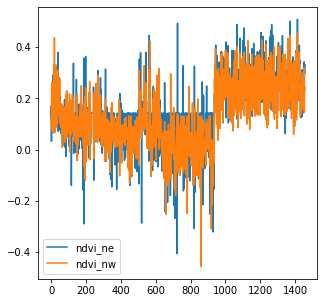

In [ ]:
plt.figure(figsize=(5,5))
train['ndvi_ne'].plot()
train['ndvi_nw'].plot()
plt.legend()

In [ ]:
df=pd.merge(train, feat_train)

In [ ]:
df.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,Mumbai,1990,18,30/04/1990,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,Mumbai,1990,19,07/05/1990,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,Mumbai,1990,20,14/05/1990,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,Mumbai,1990,21,21/05/1990,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,Mumbai,1990,22,28/05/1990,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [ ]:
c1=df[df['city']=='Mumbai']

In [ ]:
c1.shape

(936, 25)

In [ ]:
c2=df[df['city']=='Nagpur']

In [ ]:
c2.shape

(520, 25)

In [ ]:
c1['week_start_date']=pd.to_datetime(c1['week_start_date'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
c1.dtypes

city                                             object
year                                              int64
weekofyear                                        int64
week_start_date                          datetime64[ns]
ndvi_ne                                         float64
ndvi_nw                                         float64
ndvi_se                                         float64
ndvi_sw                                         float64
precipitation_amt_mm                            float64
reanalysis_air_temp_k                           float64
reanalysis_avg_temp_k                           float64
reanalysis_dew_point_temp_k                     float64
reanalysis_max_air_temp_k                       float64
reanalysis_min_air_temp_k                       float64
reanalysis_precip_amt_kg_per_m2                 float64
reanalysis_relative_humidity_percent            float64
reanalysis_sat_precip_amt_mm                    float64
reanalysis_specific_humidity_g_per_kg           

In [ ]:
%timeit pd.to_datetime(c1['week_start_date'], infer_datetime_format=True)

1.05 ms ± 9.33 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
c1.dtypes

city                                             object
year                                              int64
weekofyear                                        int64
week_start_date                          datetime64[ns]
ndvi_ne                                         float64
ndvi_nw                                         float64
ndvi_se                                         float64
ndvi_sw                                         float64
precipitation_amt_mm                            float64
reanalysis_air_temp_k                           float64
reanalysis_avg_temp_k                           float64
reanalysis_dew_point_temp_k                     float64
reanalysis_max_air_temp_k                       float64
reanalysis_min_air_temp_k                       float64
reanalysis_precip_amt_kg_per_m2                 float64
reanalysis_relative_humidity_percent            float64
reanalysis_sat_precip_amt_mm                    float64
reanalysis_specific_humidity_g_per_kg           

In [ ]:
c1.set_index(c1['week_start_date'], inplace=True)

In [ ]:
c1.shape

(936, 25)

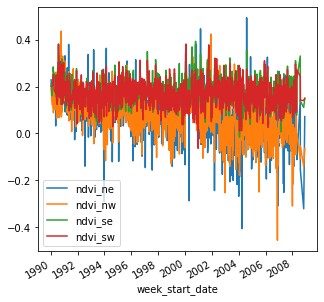

In [ ]:
plt.figure(figsize=(5,5))
c1['ndvi_ne'].plot()
c1['ndvi_nw'].plot()
c1['ndvi_se'].plot()
c1['ndvi_sw'].plot()
plt.legend()
plt.show()

In [ ]:
%timeit pd.to_datetime(c2['week_start_date'], infer_datetime_format=True)

1.19 ms ± 12.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
c2.set_index(c2['week_start_date'], inplace=True)

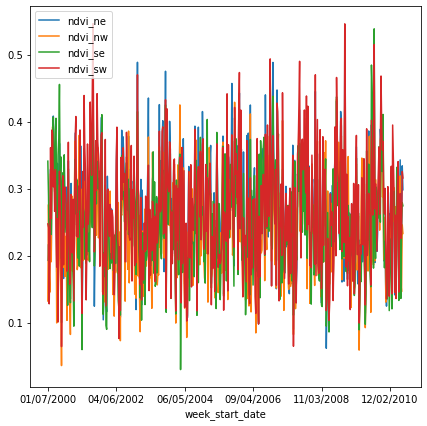

In [ ]:
plt.figure(figsize=(7,7))
c2['ndvi_ne'].plot()
c2['ndvi_nw'].plot()
c2['ndvi_se'].plot()
c2['ndvi_sw'].plot()
plt.legend()
plt.show()

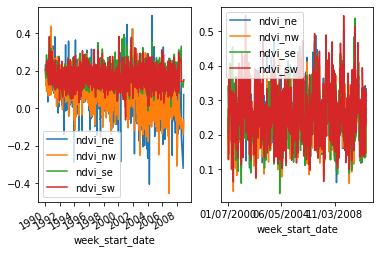

In [ ]:
plt.subplot(1,2,1)
c1['ndvi_ne'].plot()
c1['ndvi_nw'].plot()
c1['ndvi_se'].plot()
c1['ndvi_sw'].plot()
plt.legend()
plt.subplot(1,2,2)
c2['ndvi_ne'].plot()
c2['ndvi_nw'].plot()
c2['ndvi_se'].plot()
c2['ndvi_sw'].plot()
plt.legend()

In [ ]:
%timeit pd.to_datetime(df['week_start_date'], infer_datetime_format=True)

4.17 ms ± 96.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
c2['week_start_date']=pd.to_datetime(c2['week_start_date'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
c2.set_index(c2['week_start_date'], inplace=True)

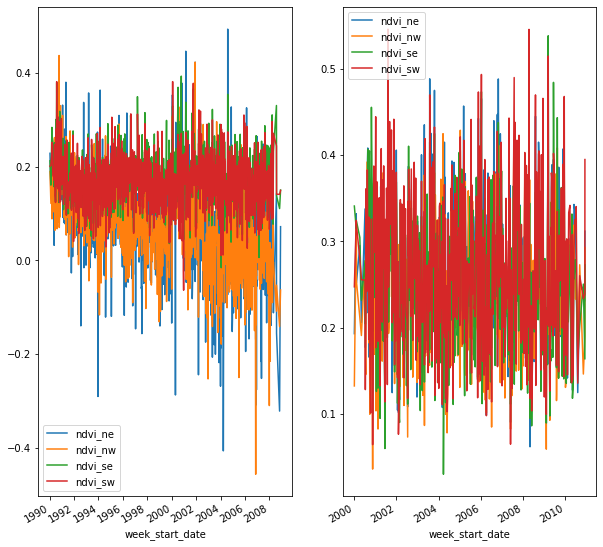

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
c1['ndvi_ne'].plot()
c1['ndvi_nw'].plot()
c1['ndvi_se'].plot()
c1['ndvi_sw'].plot()
plt.legend()
plt.subplot(1,2,2)
c2['ndvi_ne'].plot()
c2['ndvi_nw'].plot()
c2['ndvi_se'].plot()
c2['ndvi_sw'].plot()
plt.legend()

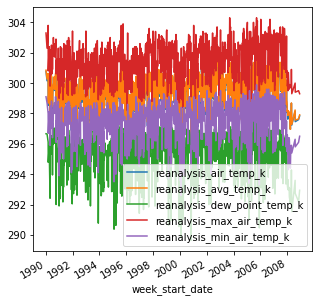

In [ ]:
plt.figure(figsize=(5,5))
c1['reanalysis_air_temp_k'].plot()
c1['reanalysis_avg_temp_k'].plot()
c1['reanalysis_dew_point_temp_k'].plot()
c1['reanalysis_max_air_temp_k'].plot()
c1['reanalysis_min_air_temp_k'].plot()
plt.legend()

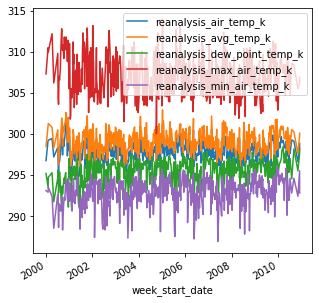

In [ ]:
plt.figure(figsize=(5,5))
c2['reanalysis_air_temp_k'].plot()
c2['reanalysis_avg_temp_k'].plot()
c2['reanalysis_dew_point_temp_k'].plot()
c2['reanalysis_max_air_temp_k'].plot()
c2['reanalysis_min_air_temp_k'].plot()
plt.legend()

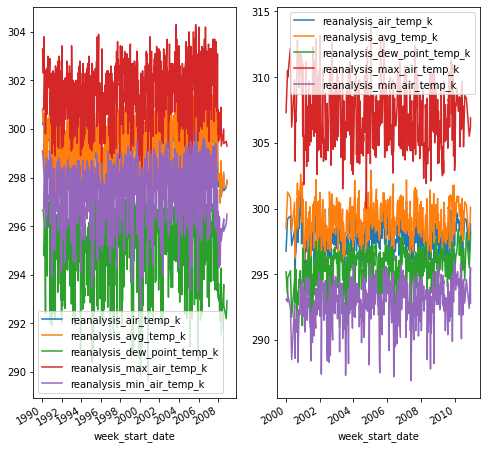

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
c1['reanalysis_air_temp_k'].plot()
c1['reanalysis_avg_temp_k'].plot()
c1['reanalysis_dew_point_temp_k'].plot()
c1['reanalysis_max_air_temp_k'].plot()
c1['reanalysis_min_air_temp_k'].plot()
plt.legend()
plt.subplot(1,2,2)
c2['reanalysis_air_temp_k'].plot()
c2['reanalysis_avg_temp_k'].plot()
c2['reanalysis_dew_point_temp_k'].plot()
c2['reanalysis_max_air_temp_k'].plot()
c2['reanalysis_min_air_temp_k'].plot()
plt.legend()

In [ ]:
df.dtypes

city                                      object
year                                       int64
weekofyear                                 int64
week_start_date                           object
ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64
precipitation_amt_mm                     float64
reanalysis_air_temp_k                    float64
reanalysis_avg_temp_k                    float64
reanalysis_dew_point_temp_k              float64
reanalysis_max_air_temp_k                float64
reanalysis_min_air_temp_k                float64
reanalysis_precip_amt_kg_per_m2          float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_avg_temp_c                       float64
station_diur_temp_rn

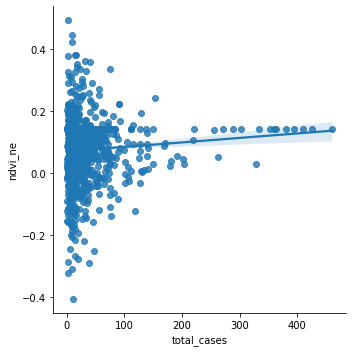

In [ ]:
g=sns.lmplot(x='total_cases', y='ndvi_ne', data=c1, markers='o')
#g=sns.lmplot(x='total_cases', y='ndvi_nw', data=c1, markers='v')
#g=sns.lmplot(x='total_cases', y='ndvi_se', data=c1, markers='^')
#g=sns.lmplot(x='total_cases', y='ndvi_sw', data=c1, markers='s')

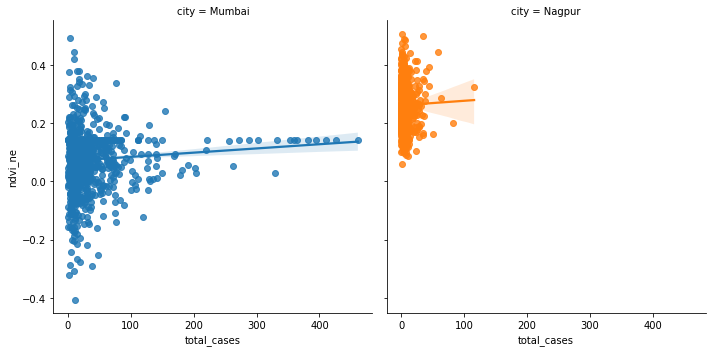

In [ ]:
g=sns.lmplot(x='total_cases', y='ndvi_ne', data=df, markers='o', col='city', hue='city')
#g=sns.lmplot(x='total_cases', y='ndvi_nw', data=df, markers='o', col='city', hue='city')
#g=sns.lmplot(x='total_cases', y='ndvi_se', data=df, markers='o', col='city', hue='city')
#g=sns.lmplot(x='total_cases', y='ndvi_sw', data=df, markers='o', col='city', hue='city')

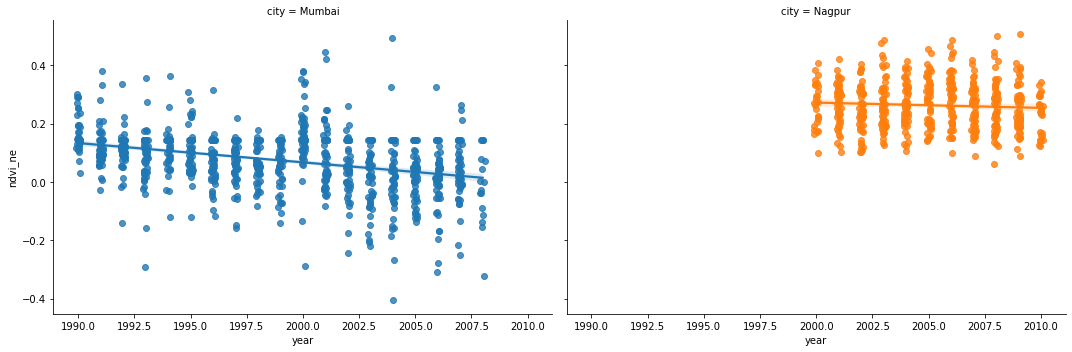

In [ ]:
g=sns.lmplot(x='year', y='ndvi_ne', data=df, markers='o', col='city', hue='city',aspect=1.5, x_jitter=.1)
#g=sns.lmplot(x='year', y='ndvi_nw', data=df, markers='v', col='city', hue='city',aspect=1.5, x_jitter=.1)
#g=sns.lmplot(x='year', y='ndvi_se', data=df, markers='s', col='city', hue='city',aspect=1.5, x_jitter=.1)
#g=sns.lmplot(x='year', y='ndvi_sw', data=df, markers='^', col='city', hue='city',aspect=1.5, x_jitter=.1)

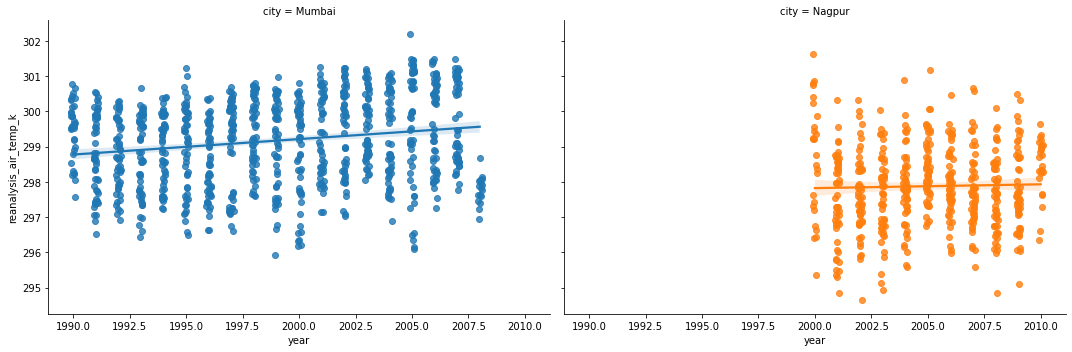

In [ ]:
g=sns.lmplot(x='year', y='reanalysis_air_temp_k', data=df, markers='o', col='city', hue='city',aspect=1.5, x_jitter=.1)
#g=sns.lmplot(x='year', y='reanalysis_avg_temp_k', data=df, markers='v', col='city', hue='city',aspect=1.5, x_jitter=.1)
#g=sns.lmplot(x='year', y='reanalysis_dew_point_temp_k', data=df, markers='s', col='city', hue='city',aspect=1.5, x_jitter=.1)
#g=sns.lmplot(x='year', y='reanalysis_max_air_temp_k', data=df, markers='^', col='city', hue='city',aspect=1.5, x_jitter=.1)
#g=sns.lmplot(x='year', y='reanalysis_min_air_temp_k', data=df, markers='^', col='city', hue='city',aspect=1.5, x_jitter=.1)

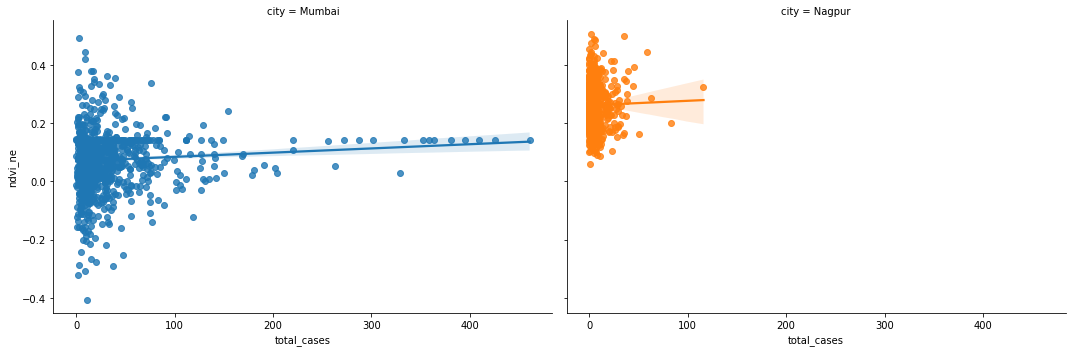

In [ ]:
g=sns.lmplot(x='total_cases', y='ndvi_ne', data=df, markers='o', col='city', hue='city',aspect=1.5, x_jitter=.1)
#g=sns.lmplot(x='total_cases', y='ndvi_nw', data=df, markers='v', col='city', hue='city',aspect=1.5, x_jitter=.1)
#g=sns.lmplot(x='total_cases', y='ndvi_se', data=df, markers='s', col='city', hue='city',aspect=1.5, x_jitter=.1)
#g=sns.lmplot(x='total_cases', y='ndvi_sw', data=df, markers='^', col='city', hue='city',aspect=1.5, x_jitter=.1)

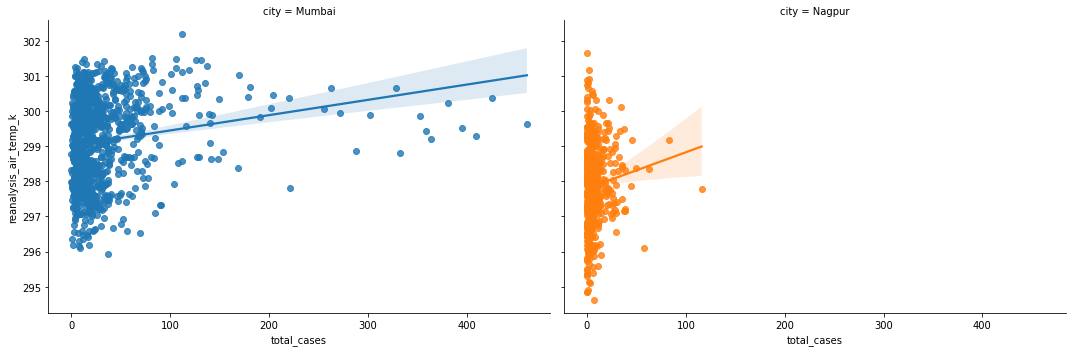

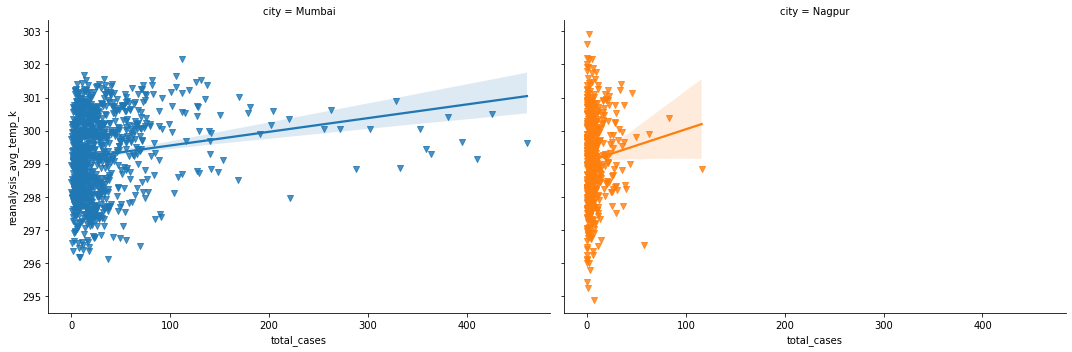

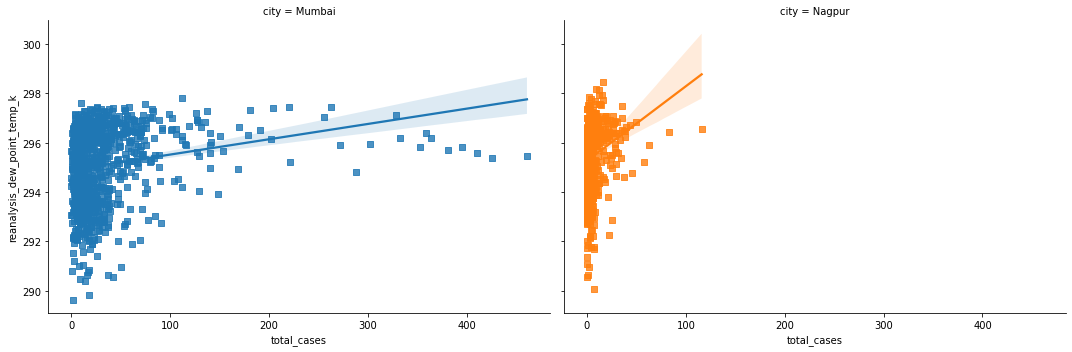

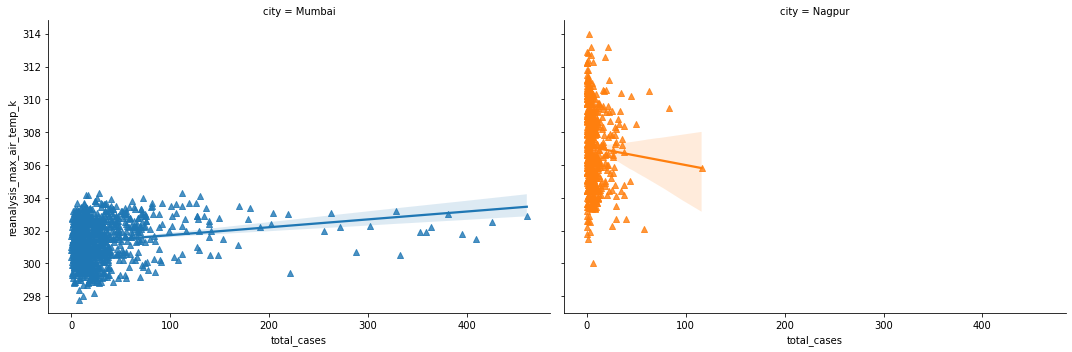

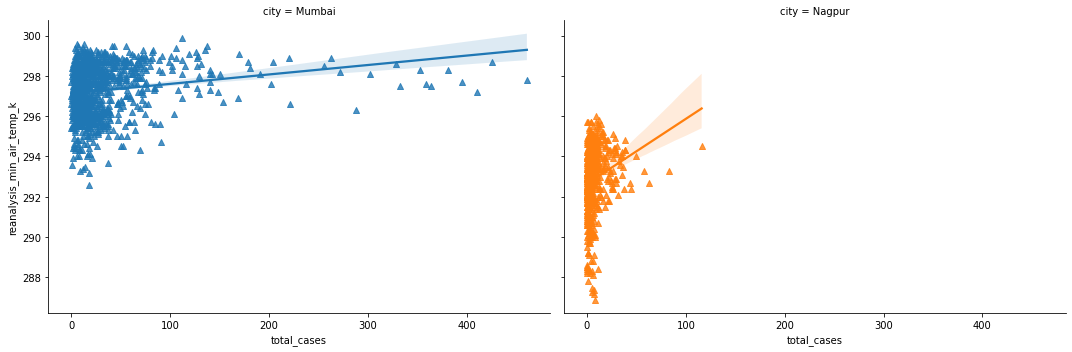

In [ ]:
g=sns.lmplot(x='total_cases', y='reanalysis_air_temp_k', data=df, markers='o', col='city', hue='city',aspect=1.5, x_jitter=.1)
g=sns.lmplot(x='total_cases', y='reanalysis_avg_temp_k', data=df, markers='v', col='city', hue='city',aspect=1.5, x_jitter=.1)
g=sns.lmplot(x='total_cases', y='reanalysis_dew_point_temp_k', data=df, markers='s', col='city', hue='city',aspect=1.5, x_jitter=.1)
g=sns.lmplot(x='total_cases', y='reanalysis_max_air_temp_k', data=df, markers='^', col='city', hue='city',aspect=1.5, x_jitter=.1)
g=sns.lmplot(x='total_cases', y='reanalysis_min_air_temp_k', data=df, markers='^', col='city', hue='city',aspect=1.5, x_jitter=.1)

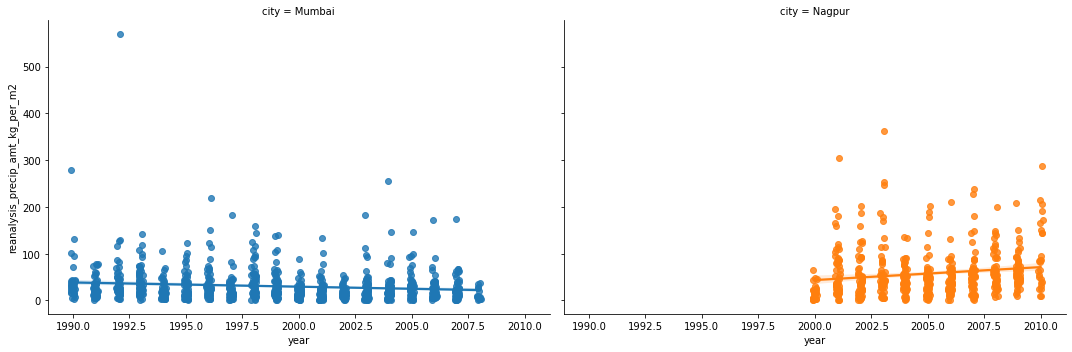

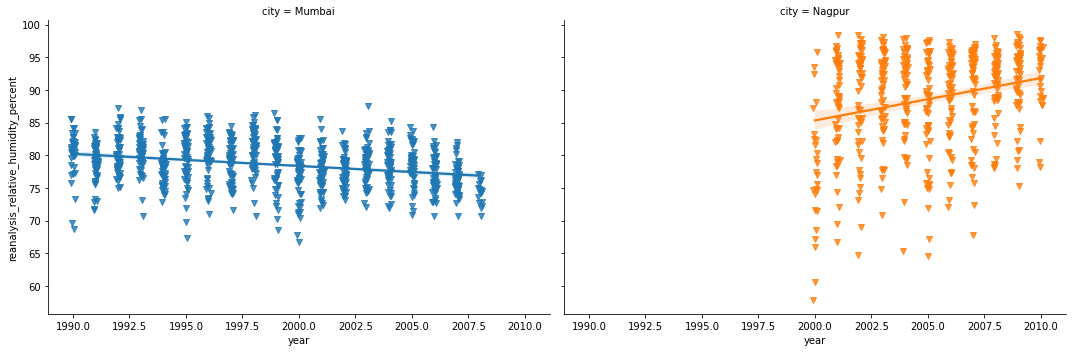

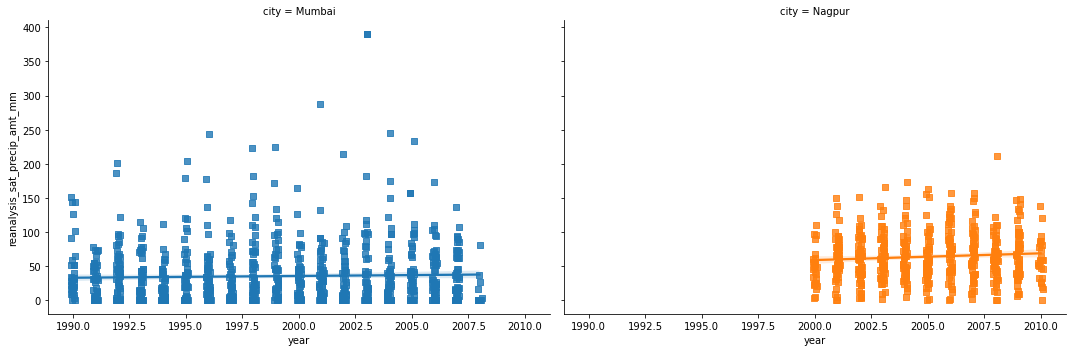

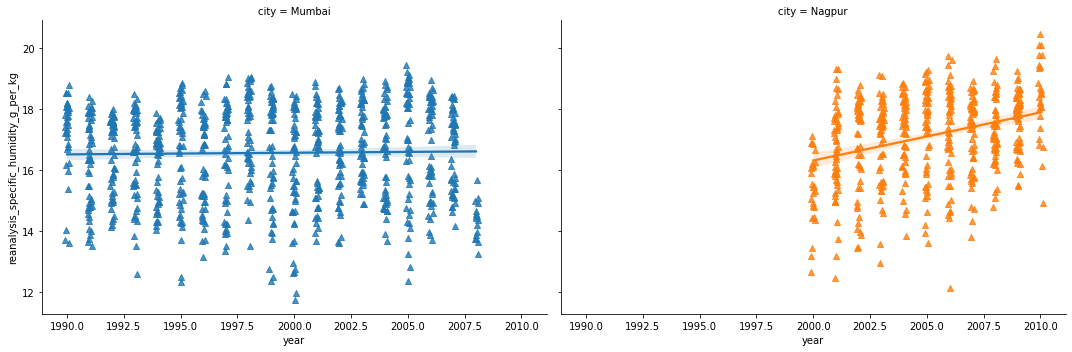

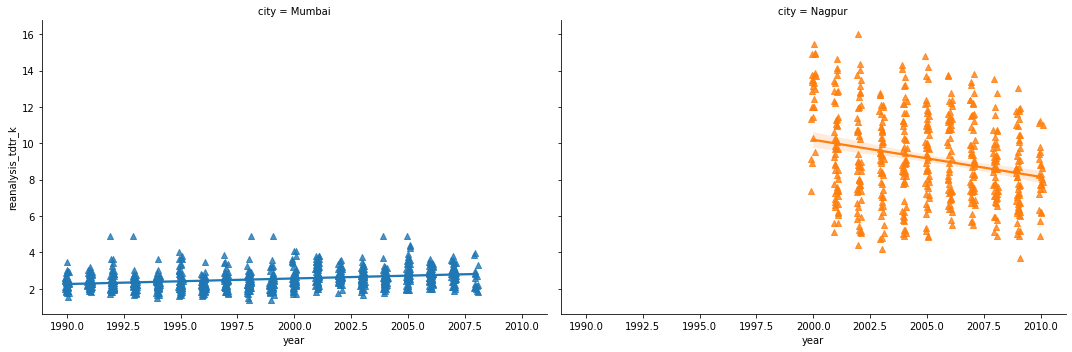

In [ ]:
g=sns.lmplot(x='year', y='reanalysis_precip_amt_kg_per_m2', data=df, markers='o', col='city', hue='city',aspect=1.5, x_jitter=.1)
g=sns.lmplot(x='year', y='reanalysis_relative_humidity_percent', data=df, markers='v', col='city', hue='city',aspect=1.5, x_jitter=.1)
g=sns.lmplot(x='year', y='reanalysis_sat_precip_amt_mm', data=df, markers='s', col='city', hue='city',aspect=1.5, x_jitter=.1)
g=sns.lmplot(x='year', y='reanalysis_specific_humidity_g_per_kg', data=df, markers='^', col='city', hue='city',aspect=1.5, x_jitter=.1)
g=sns.lmplot(x='year', y='reanalysis_tdtr_k', data=df, markers='^', col='city', hue='city',aspect=1.5, x_jitter=.1)

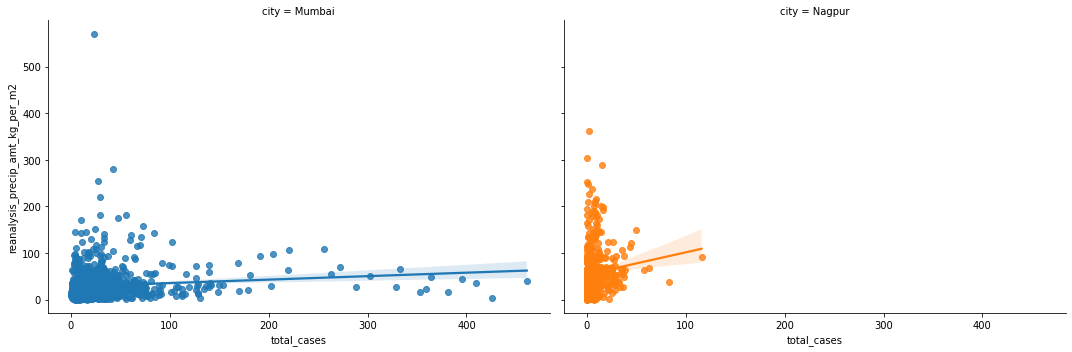

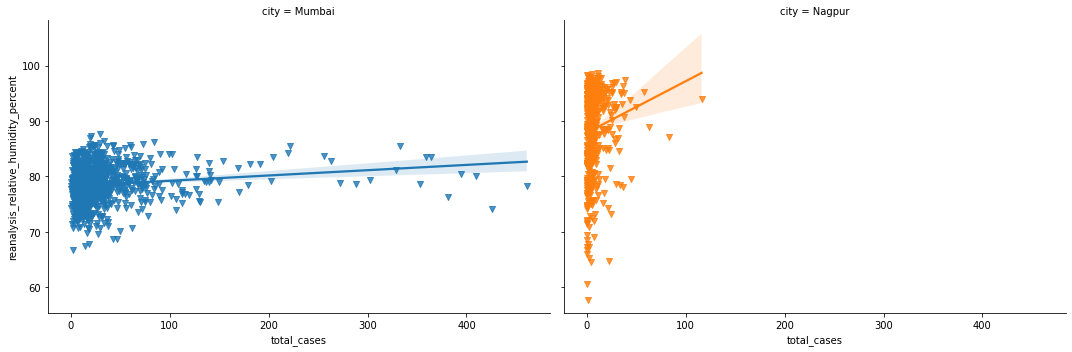

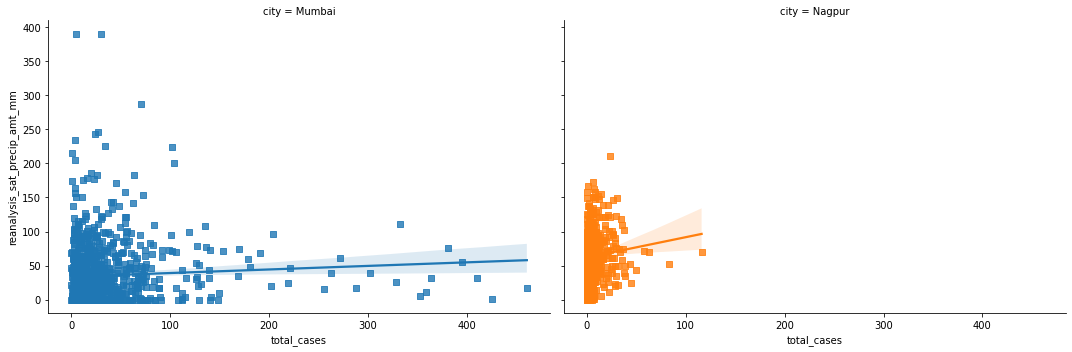

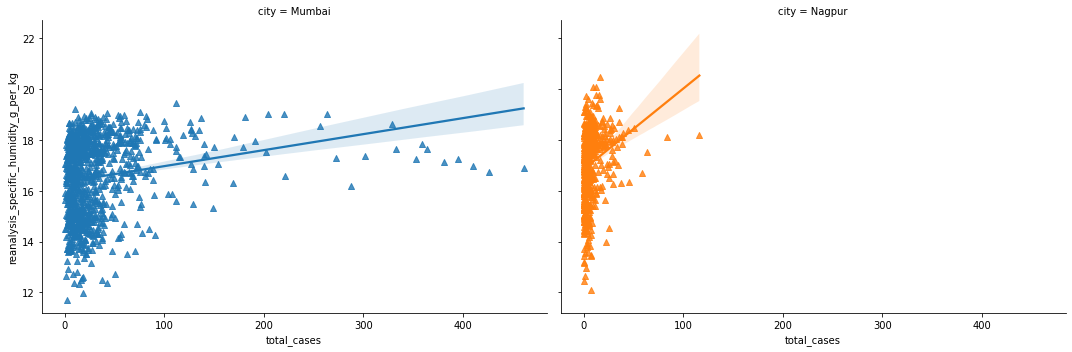

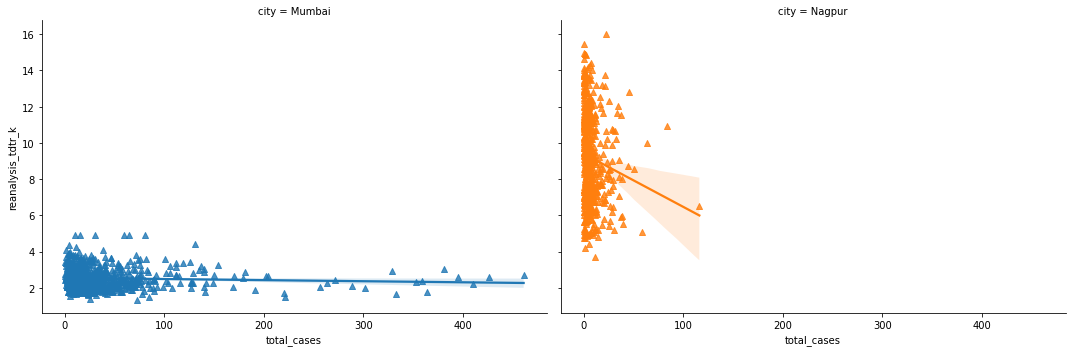

In [ ]:
g=sns.lmplot(x='total_cases', y='reanalysis_precip_amt_kg_per_m2', data=df, markers='o', col='city', hue='city',aspect=1.5, x_jitter=.1)
g=sns.lmplot(x='total_cases', y='reanalysis_relative_humidity_percent', data=df, markers='v', col='city', hue='city',aspect=1.5, x_jitter=.1)
g=sns.lmplot(x='total_cases', y='reanalysis_sat_precip_amt_mm', data=df, markers='s', col='city', hue='city',aspect=1.5, x_jitter=.1)
g=sns.lmplot(x='total_cases', y='reanalysis_specific_humidity_g_per_kg', data=df, markers='^', col='city', hue='city',aspect=1.5, x_jitter=.1)
g=sns.lmplot(x='total_cases', y='reanalysis_tdtr_k', data=df, markers='^', col='city', hue='city',aspect=1.5, x_jitter=.1)

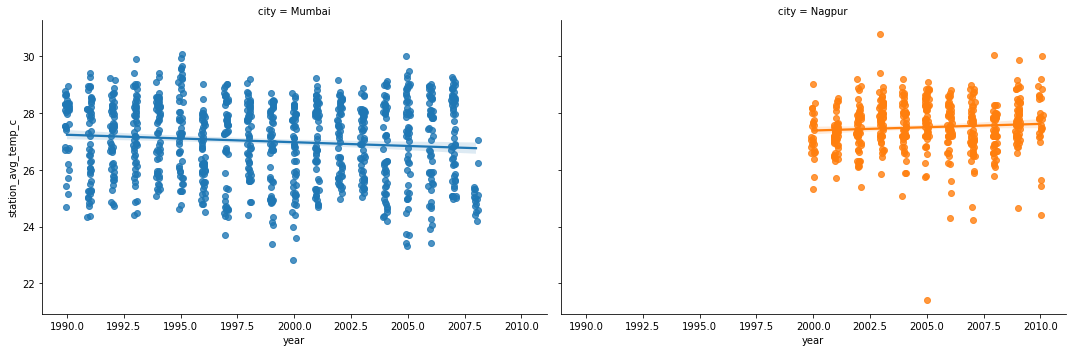

In [ ]:
g=sns.lmplot(x='year', y='station_avg_temp_c', data=df, markers='o', col='city', hue='city',aspect=1.5, x_jitter=.1)
#g=sns.lmplot(x='year', y='station_diur_temp_rng_c', data=df, markers='v', col='city', hue='city',aspect=1.5, x_jitter=.1)
#g=sns.lmplot(x='year', y='station_max_temp_c', data=df, markers='s', col='city', hue='city',aspect=1.5, x_jitter=.1)
#g=sns.lmplot(x='year', y='station_min_temp_c', data=df, markers='^', col='city', hue='city',aspect=1.5, x_jitter=.1)

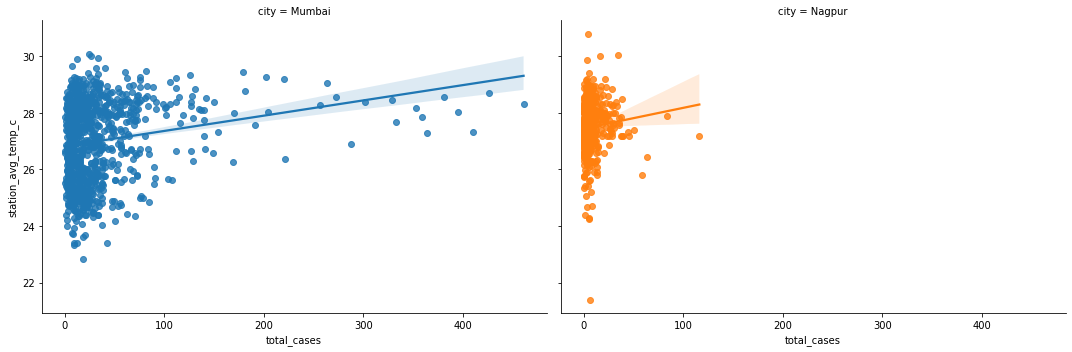

In [ ]:
g=sns.lmplot(x='total_cases', y='station_avg_temp_c', data=df, markers='o', col='city', hue='city',aspect=1.5, x_jitter=.1)
#g=sns.lmplot(x='total_cases', y='station_diur_temp_rng_c', data=df, markers='v', col='city', hue='city',aspect=1.5, x_jitter=.1)
#g=sns.lmplot(x='total_cases', y='station_max_temp_c', data=df, markers='s', col='city', hue='city',aspect=1.5, x_jitter=.1)
#g=sns.lmplot(x='total_cases', y='station_min_temp_c', data=df, markers='^', col='city', hue='city',aspect=1.5, x_jitter=.1)

In [ ]:
feature_col=['city','week_start_date', 'total_cases','weekofyear']
X=df.drop(feature_col, axis=1)

In [ ]:
X.shape

(1456, 21)

In [ ]:
y=df.iloc[:,24]

In [ ]:
y.shape

(1456,)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [ ]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.09589041 0.03424658 0.08219178 0.08219178 0.08219178 0.05479452
 0.04137931 0.02758621 0.06206897 0.06896552]


In [ ]:
np.mean(score)*100

6.315068493150686

In [ ]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.0890411  0.07534247 0.0890411  0.08219178 0.04109589 0.0890411
 0.04827586 0.07586207 0.05517241 0.06206897]


In [ ]:
np.mean(score)*100

7.071327350023618

In [ ]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.07534247 0.0890411  0.0890411  0.0890411  0.08219178 0.08219178
 0.09655172 0.08275862 0.06896552 0.09655172]


In [ ]:
np.mean(score)*100

8.516769012753898

In [ ]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.07534247 0.08219178 0.04794521 0.06849315 0.04794521 0.09589041
 0.06206897 0.04827586 0.08965517 0.08275862]


In [ ]:
np.mean(score)*100

7.005668398677374

In [ ]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.06849315 0.06849315 0.06164384 0.06849315 0.06164384 0.07534247
 0.06206897 0.05517241 0.07586207 0.08965517]


In [ ]:
np.mean(score)*100

6.86868209730751

In [ ]:
test.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,Mumbai,2008,18,29/04/2008,-0.018900,-0.018900,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,Mumbai,2008,19,06/05/2008,-0.018000,-0.012400,0.082043,0.072314,12.56,298.475714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,Mumbai,2008,20,13/05/2008,-0.001500,0.130553,0.151083,0.091529,3.66,299.455714,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,Mumbai,2008,21,20/05/2008,0.142294,-0.019867,0.124329,0.125686,0.00,299.690000,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,Mumbai,2008,22,27/05/2008,0.056800,0.039833,0.062267,0.075914,0.76,299.780000,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


In [ ]:
feature_col=['city','week_start_date', 'weekofyear']
test=test.drop(feature_col, axis=1)

In [ ]:
clf=SVC()
clf.fit(X, y)

pred=clf.predict(test)

In [ ]:
submission = pd.DataFrame({
        "total": pred
})

submission.to_csv('submission_format.csv', index=False)

In [ ]:
submission = pd.read_csv('submission_format.csv')
submission.head()

,total
0,0
1,0
2,0
3,0
4,0
